**242 Final Project: Rate My Professor - Logistic Regression**


**Author: Xinlin Huang**

In [ ]:
# Run the codes below in order.

**Rate My Professor - Logistic Regression**

We first conduct feature engineering to select independent variables for the Logistic Regression. 

For the first step after cleaning the dataset, we remove multicollinearity by removing independent variables with a VIF greater than 5. Next, we fit logistic regression on the training set. In this process, we drop the independent variable with the highest p-value one by one and rerun the regression until all the remaining predictors have a p-value less than 0.05.


The final set of independent variables selected for the logistic regression is listed below.


['Difficulty',
 'accessible_outside_class',
 'amazing_lectures',
 'caring',
 'clear_grading_criteria',
 'extra_credit',
 'get_ready_to_read',
 'gives_good_feedback',
 'hilarious',
 'inspirational',
 'participation_matters',
 'respected',
 'skip_class_you_wont_pass',
 'so_many_papers',
 'tough_grader',
 'Attendance_Not',
 'TakeAgain_Yes',
 'Grade_AuditNoGrade',
 'Grade_B',
 'Grade_C',
 'Grade_D',
 'Grade_Drop',
 'Grade_F',
 'Grade_Incomplete',
 'Grade_Missing',
 'Grade_NotSure',
 'Grade_Rather',
 'Textbook_No',
 'Textbook_Yes']

The following attributes have a positive coefficient, so having theses attributes will increase the probability of a professor to be good at teaching. 

['accessible_outside_class',
 'amazing_lectures',
 'caring',
 'clear_grading_criteria',
 'extra_credit',
 'get_ready_to_read',
 'gives_good_feedback',
 'hilarious',
 'inspirational',
 'participation_matters',
 'respected',
 'skip_class_you_wont_pass',
  'TakeAgain_Yes']

The attributes with the top three coefficients are **amazing_lectures, inspirational, respected.** This implies that students on average care the most about how the professor delivers lectures. Students also value whether they receive appropriate respect from their professors. 

The variables with the most negative coefficients are **grades**.

Using Bootstrap, we get that the fitted logistic regression model has **an average Accuracy of 0.8775, TPR of 0.8901, and FRP of 0.1424.**


Logistic Regression Test Set Performance:

Accuracy Mean:  0.877485918641037
Accuracy Variance:  1.586666228809528e-05
95% CI for Accuracy:  [0.86991506 0.88563925]

TPR Mean:  0.8900661711240986
TPR Variance:  2.4480048983953225e-05
95% CI for TPR:  [0.88005329 0.89915248]

FPR Mean:  0.14243476312166553
FPR Variance:  4.6112184052746624e-05
95% CI for FPR:  [0.12925259 0.15534591]

**The ROC curve is plotted below.**

The AUC is 0.94. This means that given a randomly selected professor who teaches well and a randomly selected professor who does not teach well, the logistic model has a likelihood of 0.94 to correctly differentiate which is which.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
path = os.getcwd() + "/rmp_train.csv"
RMP_train = pd.read_csv(path)
RMP_train.info()
RMP_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20131 entries, 0 to 20130
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GoodTeaching              20131 non-null  int64  
 1   Difficulty                20131 non-null  float64
 2   Credit                    20131 non-null  object 
 3   Attendance                20131 non-null  object 
 4   TakeAgain                 20131 non-null  object 
 5   Grade                     20131 non-null  object 
 6   Textbook                  20131 non-null  object 
 7   accessible_outside_class  20131 non-null  int64  
 8   amazing_lectures          20131 non-null  int64  
 9   beware_of_pop_quizzes     20131 non-null  int64  
 10  caring                    20131 non-null  int64  
 11  clear_grading_criteria    20131 non-null  int64  
 12  extra_credit              20131 non-null  int64  
 13  get_ready_to_read         20131 non-null  int64  
 14  gives_

,GoodTeaching,Difficulty,Credit,Attendance,TakeAgain,Grade,Textbook,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,...,hilarious,inspirational,lecture_heavy,lots_of_homework,participation_matters,respected,skip_class_you_wont_pass,so_many_papers,test_heavy,tough_grader
0,1,3.0,Yes,Mandatory,Yes,A,Yes,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,4.0,Missing,Not,Missing,NotSure,No,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,4.0,Yes,Mandatory,Yes,B,No,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,3.0,Yes,Mandatory,Yes,A,Yes,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.0,Yes,Mandatory,Yes,C,Yes,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# Create dummies for Categotical Variables

RMP_train = pd.get_dummies(data=RMP_train, drop_first = True)
RMP_train.head()

,GoodTeaching,Difficulty,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,caring,clear_grading_criteria,extra_credit,get_ready_to_read,gives_good_feedback,...,Grade_C,Grade_D,Grade_Drop,Grade_F,Grade_Incomplete,Grade_Missing,Grade_NotSure,Grade_Rather,Textbook_No,Textbook_Yes
0,1,3.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3.0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,4.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
y_train = RMP_train['GoodTeaching']

X_train = RMP_train.loc[:, RMP_train.columns != 'GoodTeaching']

In [ ]:
# Remove Multicollinearity
# Remove independent variables with VIF > 5

def get_final_X(X_train):
  vif_scores = pd.DataFrame() 
  vif_scores["Attribute"] = X_train.columns
  vif_scores["VIF Scores"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))] 
  while(True):
    if vif_scores['VIF Scores'].max() > 5:
      print('Remove:\n', vif_scores.loc[vif_scores['VIF Scores'].idxmax()])
      Remove_Attribute = vif_scores.loc[vif_scores['VIF Scores'].idxmax(), 'Attribute']
      X_train = X_train.drop([Remove_Attribute], axis=1)
      vif_scores = pd.DataFrame() 
      vif_scores["Attribute"] = X_train.columns
      vif_scores["VIF Scores"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    else:
      break
  display(vif_scores)


In [ ]:
get_final_X(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Remove:
 Attribute     Credit_Yes
VIF Scores           inf
Name: 21, dtype: object
Remove:
 Attribute     Textbook_Yes
VIF Scores       35.218353
Name: 35, dtype: object
Remove:
 Attribute     TakeAgain_Yes
VIF Scores        18.519017
Name: 23, dtype: object
Remove:
 Attribute     Difficulty
VIF Scores     10.610121
Name: 0, dtype: object


,Attribute,VIF Scores
0,accessible_outside_class,1.145845
1,amazing_lectures,1.185628
2,beware_of_pop_quizzes,1.035148
3,caring,1.245949
4,clear_grading_criteria,1.142229
5,extra_credit,1.059713
6,get_ready_to_read,1.211474
7,gives_good_feedback,1.251960
8,graded_by_few_things,1.174234
9,group_projects,1.049766


In [ ]:
y_variable = 'GoodTeaching'
X_variables_list = list(X_train)

In [ ]:
# Function to get the logistic regression formula

def get_formula(y_variable, X_variables_list):
  formula = y_variable + ' ~ ' + X_variables_list[0]
  for i in range(1,len(X_variables_list)):
    formula = formula + ' + ' + X_variables_list[i]
  return formula

In [ ]:
get_formula(y_variable, X_variables_list)

'GoodTeaching ~ Difficulty + accessible_outside_class + amazing_lectures + beware_of_pop_quizzes + caring + clear_grading_criteria + extra_credit + get_ready_to_read + gives_good_feedback + graded_by_few_things + group_projects + hilarious + inspirational + lecture_heavy + lots_of_homework + participation_matters + respected + skip_class_you_wont_pass + so_many_papers + test_heavy + tough_grader + Credit_Yes + Attendance_Missing + Attendance_Not + TakeAgain_Yes + Grade_AuditNoGrade + Grade_B + Grade_C + Grade_D + Grade_Drop + Grade_F + Grade_Incomplete + Grade_Missing + Grade_NotSure + Grade_Rather + Textbook_No + Textbook_Yes'

In [ ]:
# Fit Logistic Regression Model

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287505
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20094
Method:                           MLE   Df Model:                           36
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5693
Time:                        01:34:51   Log-Likelihood:                -5787.8
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1202      0.243      0.495      0.620      -0.355

In [ ]:
# Remove variables that are statistically insignificant at 95% confidence level (p-value>0.05)
# Remove Credit_Yes

X_variables_list.remove('Credit_Yes')

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287505
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20094
Method:                           MLE   Df Model:                           36
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5693
Time:                        01:35:47   Log-Likelihood:                -5787.8
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1202      0.370      0.325      0.745      -0.605

In [ ]:
# Remove beware_of_pop_quizzes

X_variables_list.remove('beware_of_pop_quizzes')

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287505
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20095
Method:                           MLE   Df Model:                           35
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5693
Time:                        01:35:52   Log-Likelihood:                -5787.8
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1201      0.370      0.325      0.745      -0.604

In [ ]:
# Remove lots_of_homework

X_variables_list.remove('lots_of_homework')

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287506
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20096
Method:                           MLE   Df Model:                           34
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5693
Time:                        01:35:55   Log-Likelihood:                -5787.8
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1263      0.367      0.344      0.731      -0.593

In [ ]:
# Remove graded_by_few_things

X_variables_list.remove('graded_by_few_things')

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287506
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20097
Method:                           MLE   Df Model:                           33
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5693
Time:                        01:35:59   Log-Likelihood:                -5787.8
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1306      0.366      0.357      0.721      -0.586

In [ ]:
# Remove Attendance_Missing

X_variables_list.remove('Attendance_Missing')

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287509
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20098
Method:                           MLE   Df Model:                           32
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5693
Time:                        01:37:27   Log-Likelihood:                -5787.8
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1398      0.364      0.384      0.701      -0.574

In [ ]:
# Remove test_heavy

X_variables_list.remove('test_heavy')

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287512
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20099
Method:                           MLE   Df Model:                           31
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5693
Time:                        01:37:37   Log-Likelihood:                -5787.9
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1433      0.364      0.394      0.694      -0.570

In [ ]:
# Remove lecture_heavy

X_variables_list.remove('lecture_heavy')

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287596
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20100
Method:                           MLE   Df Model:                           30
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5692
Time:                        01:38:00   Log-Likelihood:                -5789.6
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1835      0.363      0.505      0.613      -0.528

In [ ]:
# Remove group_projects

X_variables_list.remove('group_projects')

logreg = smf.logit(formula = get_formula(y_variable, X_variables_list), data = RMP_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287681
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           GoodTeaching   No. Observations:                20131
Model:                          Logit   Df Residuals:                    20101
Method:                           MLE   Df Model:                           29
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.5691
Time:                        01:38:13   Log-Likelihood:                -5791.3
converged:                       True   LL-Null:                       -13439.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.2094      0.363      0.577      0.564      -0.501

Above is the final model, since the coefficients of all variables have a p-value < 0.05 and are thua statistically significant at the 95% confidence level.

In [ ]:
# Final independent variables selected:
X_variables_list

['Difficulty',
 'accessible_outside_class',
 'amazing_lectures',
 'caring',
 'clear_grading_criteria',
 'extra_credit',
 'get_ready_to_read',
 'gives_good_feedback',
 'hilarious',
 'inspirational',
 'participation_matters',
 'respected',
 'skip_class_you_wont_pass',
 'so_many_papers',
 'tough_grader',
 'Attendance_Not',
 'TakeAgain_Yes',
 'Grade_AuditNoGrade',
 'Grade_B',
 'Grade_C',
 'Grade_D',
 'Grade_Drop',
 'Grade_F',
 'Grade_Incomplete',
 'Grade_Missing',
 'Grade_NotSure',
 'Grade_Rather',
 'Textbook_No',
 'Textbook_Yes']

**Test Set Performance**

In [ ]:
path2 = os.getcwd() + "/rmp_test.csv"
RMP_test = pd.read_csv(path2)
RMP_test.info()
RMP_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GoodTeaching              6711 non-null   int64  
 1   Difficulty                6711 non-null   float64
 2   Credit                    6711 non-null   object 
 3   Attendance                6711 non-null   object 
 4   TakeAgain                 6711 non-null   object 
 5   Grade                     6711 non-null   object 
 6   Textbook                  6711 non-null   object 
 7   accessible_outside_class  6711 non-null   int64  
 8   amazing_lectures          6711 non-null   int64  
 9   beware_of_pop_quizzes     6711 non-null   int64  
 10  caring                    6711 non-null   int64  
 11  clear_grading_criteria    6711 non-null   int64  
 12  extra_credit              6711 non-null   int64  
 13  get_ready_to_read         6711 non-null   int64  
 14  gives_go

,GoodTeaching,Difficulty,Credit,Attendance,TakeAgain,Grade,Textbook,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,...,hilarious,inspirational,lecture_heavy,lots_of_homework,participation_matters,respected,skip_class_you_wont_pass,so_many_papers,test_heavy,tough_grader
0,0,4.0,Yes,Mandatory,Yes,C,Yes,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,3.0,Yes,Mandatory,Yes,A,No,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1.0,Yes,Mandatory,Yes,A,No,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,5.0,Missing,Not,Missing,B,Yes,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,3.0,Yes,Mandatory,Yes,B,Yes,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Create dummies for categorical variables
RMP_test = pd.get_dummies(data=RMP_test, drop_first = True)
RMP_test.head()

,GoodTeaching,Difficulty,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,caring,clear_grading_criteria,extra_credit,get_ready_to_read,gives_good_feedback,...,Grade_C,Grade_D,Grade_Drop,Grade_F,Grade_Incomplete,Grade_Missing,Grade_NotSure,Grade_Rather,Textbook_No,Textbook_Yes
0,0,4.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,3.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,5.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,3.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_test = RMP_test['GoodTeaching']

X_test = RMP_test.loc[:, X_variables_list]

In [ ]:
X_test

In [ ]:
# Define metrics

def Accuracy(y_pred, y_test, y_train=None):
  return accuracy_score(y_test, y_pred)

def TPR(y_pred, y_test, y_train=None):
  cm = confusion_matrix(y_test, y_pred)
  return cm[1][1]/(cm[1][0]+cm[1][1])

def FPR(y_pred, y_test, y_train=None):
  cm = confusion_matrix(y_test, y_pred)
  return cm[0][1]/(cm[0][0]+cm[0][1])


In [ ]:
# Bootstrap for performance metrics of Logistic Regression

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_prob = model.predict(bs_data)
        bs_predicted = pd.Series([1 if x > 0.5 else 0 for x in bs_prob], index= bs_prob.index)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
    output_df = pd.DataFrame(output_array)
    return output_df

In [ ]:
# Bootstrap for performance metrics of Logistic Regression on Test Set

bs_output_log = bootstrap_validation(X_test,y_test,y_train, logreg,
                                 metrics_list=[Accuracy, TPR, FPR],
                                 sample = 500)
Accuracy_log = bs_output_log.iloc[:,0]
TPR_log = bs_output_log.iloc[:,1]
FPR_log = bs_output_log.iloc[:,2]
CI_Accuracy_log = np.quantile(bs_output_log.iloc[:,0],np.array([0.025,0.975]))
CI_TPR_log = np.quantile(bs_output_log.iloc[:,1],np.array([0.025,0.975]))
CI_FPR_log = np.quantile(bs_output_log.iloc[:,2],np.array([0.025,0.975]))

(500, 3)


In [ ]:
print('Logistic Regression Test Set Performance:')
print('\nAccuracy Mean: ', np.average(Accuracy_log))
print('Accuracy Variance: ', np.var(Accuracy_log))
print('95% CI for Accuracy: ', CI_Accuracy_log)

print('\nTPR Mean: ', np.average(TPR_log))
print('TPR Variance: ', np.var(TPR_log))
print('95% CI for TPR: ', CI_TPR_log)

print('\nFPR Mean: ', np.average(FPR_log))
print('FPR Variance: ', np.var(FPR_log))
print('95% CI for FPR: ', CI_FPR_log)

Logistic Regression Test Set Performance:

Accuracy Mean:  0.877485918641037
Accuracy Variance:  1.586666228809528e-05
95% CI for Accuracy:  [0.86991506 0.88563925]

TPR Mean:  0.8900661711240986
TPR Variance:  2.4480048983953225e-05
95% CI for TPR:  [0.88005329 0.89915248]

FPR Mean:  0.14243476312166553
FPR Variance:  4.6112184052746624e-05
95% CI for FPR:  [0.12925259 0.15534591]


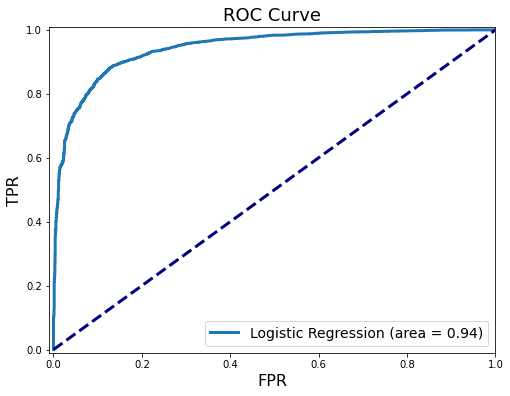

In [ ]:
# ROC Curve

y_prob = logreg.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()